In [1]:

import numpy as np
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ard-coin-price/ard.csv


![ ]( https://cdn.greensoft.mn/uploads/users/548/images/APPRENTICE%20LOGO%20ENG%20NEW_00061.png )

* While everybody was busy getting intrigued by and trying to wrap their head around the "GameStop/Wallstreetbets" craze and bitcoin's historic run, a potentially more impressive event happened under the radar in Mongolia. 

* The price of Ard coin, a blockchain-based coin created by Ard Financial Group, has increased over a hundred times within just three months. The company describes it as a blockchain-based loyalty program and holds a significant portion of it. Ard Financial Group is a prominent player in the Mongolian financial market with a few publicly traded companies in its portfolio.

* In those three months, several clever and well-timed marketing moves contributed to this massive move. More specifically, the company co-produced a Mongolian version of 'The Apprentice" show and it started to air country-wide in December 2020. In this program, the company's chairman filled the role of the main judge or Donald Trump's Mongolian counterpart. Interestingly, the coin's price peaked around the same time when the program reached its final episodes.

* In this article, I've tried to illustrate those points with data collected from Google Trends with pytrends, Alexa, and Coinmarketcap, and hopefully unravel the main drivers of those moves and other relevant factors.

In [2]:
import pandas as pd
import seaborn as sns
!pip install pytrends
import pytrends
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

pytrend = TrendReq()
pytrends = TrendReq(geo='MN')
ard_list = ['ard coin']
app_list = ['apprentice']

pytrend.build_payload(ard_list, timeframe='2019-12-19 2021-03-15')
pytrends.build_payload(app_list, timeframe='2019-12-19 2021-03-15')
ard_data = pytrend.interest_over_time()
app_data = pytrends.interest_over_time()

ard_coin_price = pd.read_csv('../input/ard-coin-price/ard.csv', index_col='Date')
ard_price = pd.DataFrame(ard_coin_price, columns=['Close**'])
ard_price.index = pd.to_datetime(ard_price.index)

* First, I have collected data from Google Trends using pytrends for the search term 'ard coin' and 'apprentice'. More specifically, I have restricted the query for the search term 'apprentice' by the country of Mongolia and didn't filter the term "ard coin".

<AxesSubplot:title={'center':'Google Search for "Ard Coin" and "Apprentice"'}, xlabel='date'>

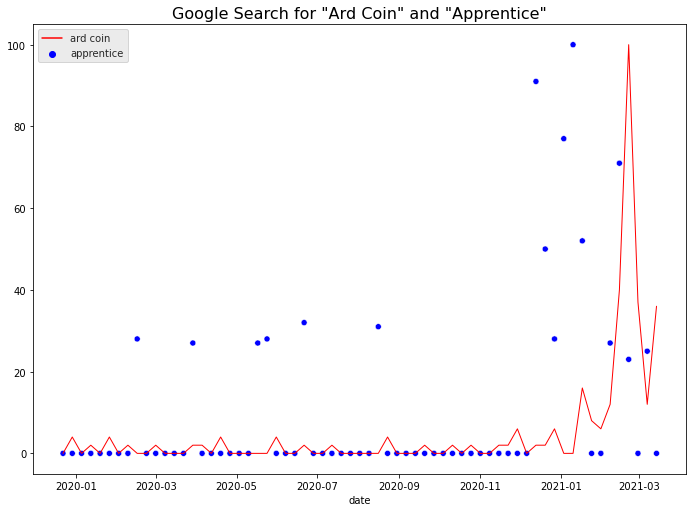

In [3]:
fig, ax = plt.subplots(figsize= (11.7, 8.27))
plt.title('Google Search for "Ard Coin" and "Apprentice"', fontsize = 16)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
price = pd.DataFrame(ard_data, columns=['ard coin'])
interest = pd.DataFrame(app_data, columns=['apprentice'])
sns.lineplot(data = price, palette=['red'], linewidth = 1)
sns.scatterplot(data = interest, palette=['blue'])

* As you can see from the graph above, searches for the term 'Apprentice' (blue dots) started to increase as the first episode aired on December 13, 2020. If you notice the intial upticks around early 2020, that's when the promotion of the program started. What's more interesting is that on December 23, 2020, a strict lockdown was implemented in Ulaanbaatar. 

* It seems like people who were stuck in their homes watched the program religiously, then the positive sentiment translated as an interest toward the company. I should also add that price of stocks with the name 'Ard' in it increased substantially, which shows that the program, without a doubt, contributed to audiences' high perceived value of the company.

* Now let's see how it will map out if put together ArdCoin's search frequency and its price, then highlight the dates of the subsequent events, such as the lockdown, "The Apprentice" on a graph.

In [4]:
from IPython.display import IFrame
IFrame("https://public.tableau.com/views/ApprenticeandArdCoin/Sheet1?:language=en&:display_count=y&publish=yes&:origin=viz_share_link", width=800, height=670)

* Even though we can not say the lockdown and "The Apprentice" show direcly caused the price movement, as you can see on the graph above, it certainly fueled it to some degree. 

* Not long after the lockdown, the public interest fizzled out, but the coin is holding its value around USD 0.08.  

* Finally, I have checked if the company changed its messaging about the coin. By using Alexa, I have checked the previous version (from July 6, 2019) of the official site as shown in the snipped below. 

* Interestingly, on the previous version, it was described as "a utility token that will serve as a payment medium", which is not mentioned on the current version of the site. 

![]( https://i.imgur.com/nSShGAI.png )

# Conclusion

* I hope you find my research interesting and I really tried to be neutral and only bring out the facts and hidden patterns.  It was certainly an interesting event to observe and see its developments. If you liked my work, let me know, and I would like to do more of this kind of research in the future. 